In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()


In [2]:
#  Données  XCustomerProduct
XCustomer = pd.read_csv('P5_01_4_XCustomersProducts.csv', sep = ',', low_memory=False )
print('forme des données XCustomer: ', XCustomer.shape)
XCustomer.head(10)

forme des données XCustomer:  (99201, 14)


,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,4,29.99,8.72,SUD EST,Maison,1183,9,269.91
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,4,118.70,22.76,NORD EST,santé hygiène bébés et beauté,888,1,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,5,159.90,19.22,CENTRE OUEST,autres catégories,873,1,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,5,45.00,27.20,NORD EST,autres catégories,1136,1,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,5,19.90,8.72,SUD EST,autres catégories,1049,2,39.80
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-08-01 00:00:00,80bb27c7c16e8f973207a5086ab329e2,4,147.90,27.36,SUD,autres catégories,1268,1,147.90
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-05-09 00:00:00,36edbb3fb164b1f16485364b6fb04c73,2,49.90,16.05,SUD,none,1357,1,49.90
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-06-07 00:00:00,932afa1e708222e5821dac9cd5db4cae,5,59.99,15.17,SUD EST,autres catégories,1322,5,299.95
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-03-06 00:00:00,39382392765b6dc74812866ee5ee92a7,1,19.90,16.05,SUD,Maison,1435,3,59.70
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,5,149.99,19.77,SUD EST,Maison,1248,6,899.94


### Données 2017 par semestres

In [3]:
XCustomer_2017s1 = XCustomer.query("order_purchase_timestamp >= '2017-01-1' and order_purchase_timestamp <='2017-06-30'")

XCustomer_2017s2 = XCustomer.query("order_purchase_timestamp >= '2017-07-1' and order_purchase_timestamp <='2017-12-31'")

In [4]:
XCustomer_2017s1

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-05-09 00:00:00,36edbb3fb164b1f16485364b6fb04c73,2,49.90,16.05,SUD,none,1357,1,49.90
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-06-07 00:00:00,932afa1e708222e5821dac9cd5db4cae,5,59.99,15.17,SUD EST,autres catégories,1322,5,299.95
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-03-06 00:00:00,39382392765b6dc74812866ee5ee92a7,1,19.90,16.05,SUD,Maison,1435,3,59.70
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-06-07 00:00:00,f2a85dec752b8517b5e58a06ff3cd937,1,99.00,30.53,SUD EST,Outillage bricolage construction jardinage,1322,4,396.00
40,1e7aff52cdbb2451ace09d0f848c3699,ddaff536587109b89777e0353215e150,delivered,2017-05-19 18:53:40,2017-06-12 00:00:00,c796780c7daeab9e94cc052b1f103b21,5,119.99,34.20,SUD EST,Outillage bricolage construction jardinage,1319,1,119.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99180,f9e3402be5a5ea63344347582ca9f45f,6f2cf56878f7f82151b0ad02590192c0,delivered,2017-06-07 11:02:37,2017-07-05 00:00:00,15b1c5678192a25402638f9bb93e9c02,5,149.90,14.80,SUD EST,santé hygiène bébés et beauté,1300,3,449.70
99186,7cc85185736ea7f2d8bc09af7a47cab7,9e870ea67399650e8c3545a25d13e4d0,delivered,2017-05-15 09:46:26,2017-06-07 00:00:00,7bb6ca43f478742340256d516d9d86e3,5,179.90,15.01,CENTRE OUEST,santé hygiène bébés et beauté,1323,3,539.70
99194,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-03-17 00:00:00,e03dbdf5e56c96b106d8115ac336f47f,5,370.00,19.43,SUD EST,santé hygiène bébés et beauté,1431,6,2220.00
99195,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-03-22 00:00:00,831ce3f1bacbd424fc4e38fbd4d66d29,5,139.90,16.09,SUD EST,Maison,1404,49,6855.10


In [5]:
XCustomer_2017s2

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,4,29.99,8.72,SUD EST,Maison,1183,9,269.91
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,5,45.00,27.20,NORD EST,autres catégories,1136,1,45.00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,5,149.99,19.77,SUD EST,Maison,1248,6,899.94
11,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-08-08 00:00:00,782987b81c92239d922aa49d6bd4200b,4,98.00,16.13,SUD EST,smartphones et électroniques et informatique,1264,2,196.00
17,116f0b09343b49556bbad5f35bee0cdf,3187789bec990987628d7a9beb4dd6ac,delivered,2017-12-26 23:41:31,2018-01-29 00:00:00,6087cfc70fd833cf2db637a5e6e9d76b,5,27.99,15.10,SUD,smartphones et électroniques et informatique,1098,3,83.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99189,0e4b26f1fb99fc0f0472dd5f403d36d4,2e96fa6d55b9732013caed9866e2552d,delivered,2017-11-05 16:17:53,2017-11-17 00:00:00,22757c044f096bef19c36c5d6ffc51d5,4,28.00,9.94,SUD EST,Maison,1149,2,56.00
99191,b0f4af5c1b06e24fef510703bfe9f0a6,8e1ec396e317ff4c82a03ce16a0c3eb3,delivered,2017-10-27 15:21:00,2017-11-22 00:00:00,1a3b8f1d0782ebedbcf220a96cbc1655,5,142.50,21.80,none,santé hygiène bébés et beauté,1158,1,142.50
99192,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2018-01-18 00:00:00,a49e8e11e850592fe685ae3c64b40eca,1,55.90,15.14,SUD,sports et loisirs,1104,3,167.70
99193,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-11-07 00:00:00,c716cf2b5b86fb24257cffe9e7969df8,5,42.11,0.80,CENTRE OUEST,autres catégories,1181,8,276.04


In [6]:
# Suppression des colonnes innutiles
for c in XCustomer_2017s1.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_2017s1[c]
        
for c in XCustomer_2017s2.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_2017s2[c]       


In [7]:
# one-hot encoding of categorical variables
XCustomer_2017s1 = pd.get_dummies(XCustomer_2017s1)
# one-hot encoding of categorical variables
XCustomer_2017s2 = pd.get_dummies(XCustomer_2017s2)

print('XCustomer_2017s1 Features shape: ', XCustomer_2017s1.shape)

print('XCustomer_2017s2 Features shape: ', XCustomer_2017s2.shape)


XCustomer_2017s1 Features shape:  (14343, 19)
XCustomer_2017s2 Features shape:  (29224, 19)


In [8]:
# Suppression des colonnes innutiles
for c in XCustomer_2017s1.columns:
    if c not in ['Regions_CENTRE OUEST','Regions_NORD','Regions_NORD EST',\
                 'Regions_SUD','Regions_SUD EST','types_produits_Maison','review_score',\
                 'types_produits_Mode et Vêtements','types_produits_Outillage bricolage construction jardinage',\
                 'types_produits_alimentation et boissons','types_produits_autres catégories',\
                 'types_produits_santé hygiène bébés et beauté','types_produits_smartphones et électroniques et informatique',\
                 'types_produits_sports et loisirs','recency','frequency','monetary_value']:
        del XCustomer_2017s1[c]

# Suppression des colonnes innutiles
for c in XCustomer_2017s2.columns:
    if c not in ['Regions_CENTRE OUEST','Regions_NORD','Regions_NORD EST',\
                 'Regions_SUD','Regions_SUD EST','types_produits_Maison','review_score',\
                 'types_produits_Mode et Vêtements','types_produits_Outillage bricolage construction jardinage',\
                 'types_produits_alimentation et boissons','types_produits_autres catégories',\
                 'types_produits_santé hygiène bébés et beauté','types_produits_smartphones et électroniques et informatique',\
                 'types_produits_sports et loisirs','recency','frequency','monetary_value']:
        del XCustomer_2017s2[c] 
  

In [9]:
XCustomer_2017s1['monetary_value'] = XCustomer_2017s1['monetary_value'] + 0.0000000001
XCustomer_2017s2['monetary_value'] = XCustomer_2017s2['monetary_value'] + 0.0000000001

XCustomer_2017s1_trans = XCustomer_2017s1
XCustomer_2017s2_trans = XCustomer_2017s2

#Apply Log Transformation
XCustomer_2017s1_trans['recency'] = np.log(XCustomer_2017s1['recency'])
XCustomer_2017s1_trans['frequency'] = np.log(XCustomer_2017s1['frequency'])
XCustomer_2017s1_trans['monetary_value'] = np.log(XCustomer_2017s1['monetary_value'])

#Apply Log Transformation
XCustomer_2017s2_trans['recency'] = np.log(XCustomer_2017s2['recency'])
XCustomer_2017s2_trans['frequency'] = np.log(XCustomer_2017s2['frequency'])
XCustomer_2017s2_trans['monetary_value'] = np.log(XCustomer_2017s2['monetary_value'])


In [10]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


std_scale_2017s1 = MinMaxScaler().fit(XCustomer_2017s1_trans)
X_scaled_2017s1 = std_scale_2017s1.transform(XCustomer_2017s1_trans)

reduced_data_2017s1 = PCA(n_components=2).fit_transform(X_scaled_2017s1)

std_scale_2017s2 = MinMaxScaler().fit(XCustomer_2017s2_trans)
X_scaled_2017s2 = std_scale_2017s2.transform(XCustomer_2017s2_trans)

reduced_data_2017s2 = PCA(n_components=2).fit_transform(X_scaled_2017s2)



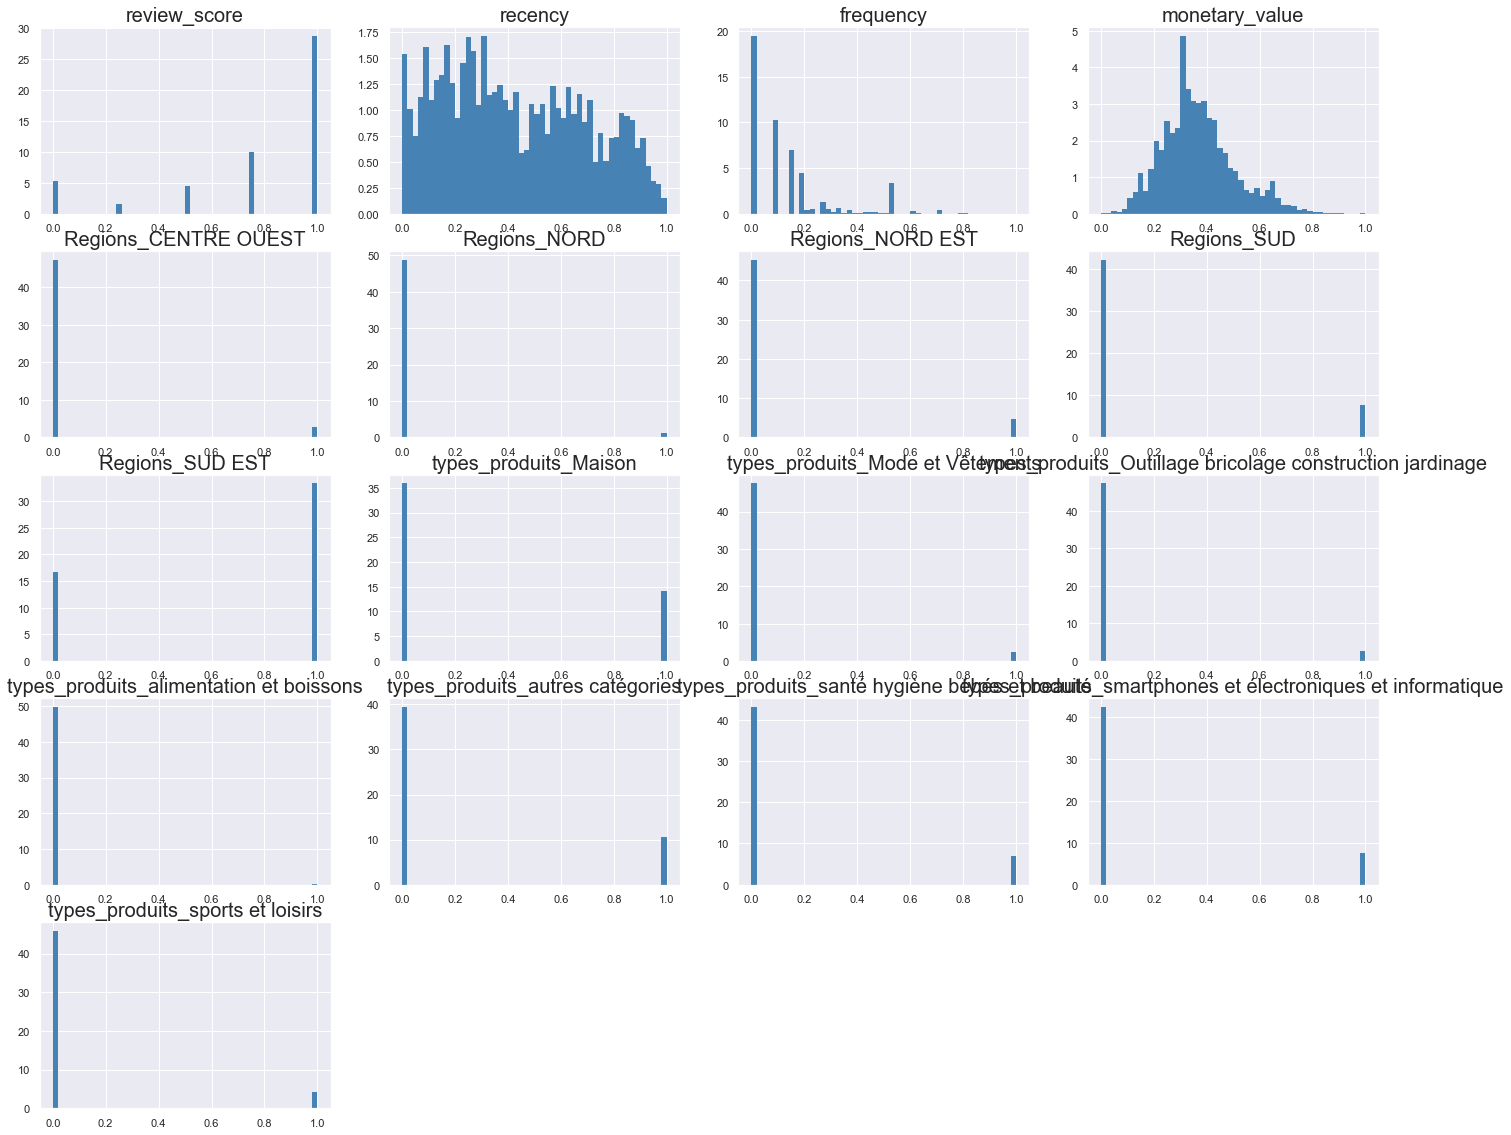

In [11]:
fig = plt.figure(figsize=(24, 24))
for feat_idx in range(X_scaled_2017s1.shape[1]):
    ax = fig.add_subplot(6,4, (feat_idx+1))
    ax.set_title(XCustomer_2017s1.columns[feat_idx], fontdict={'fontsize': 20, 'fontweight': 'medium'})
    
    h = ax.hist(X_scaled_2017s1[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')

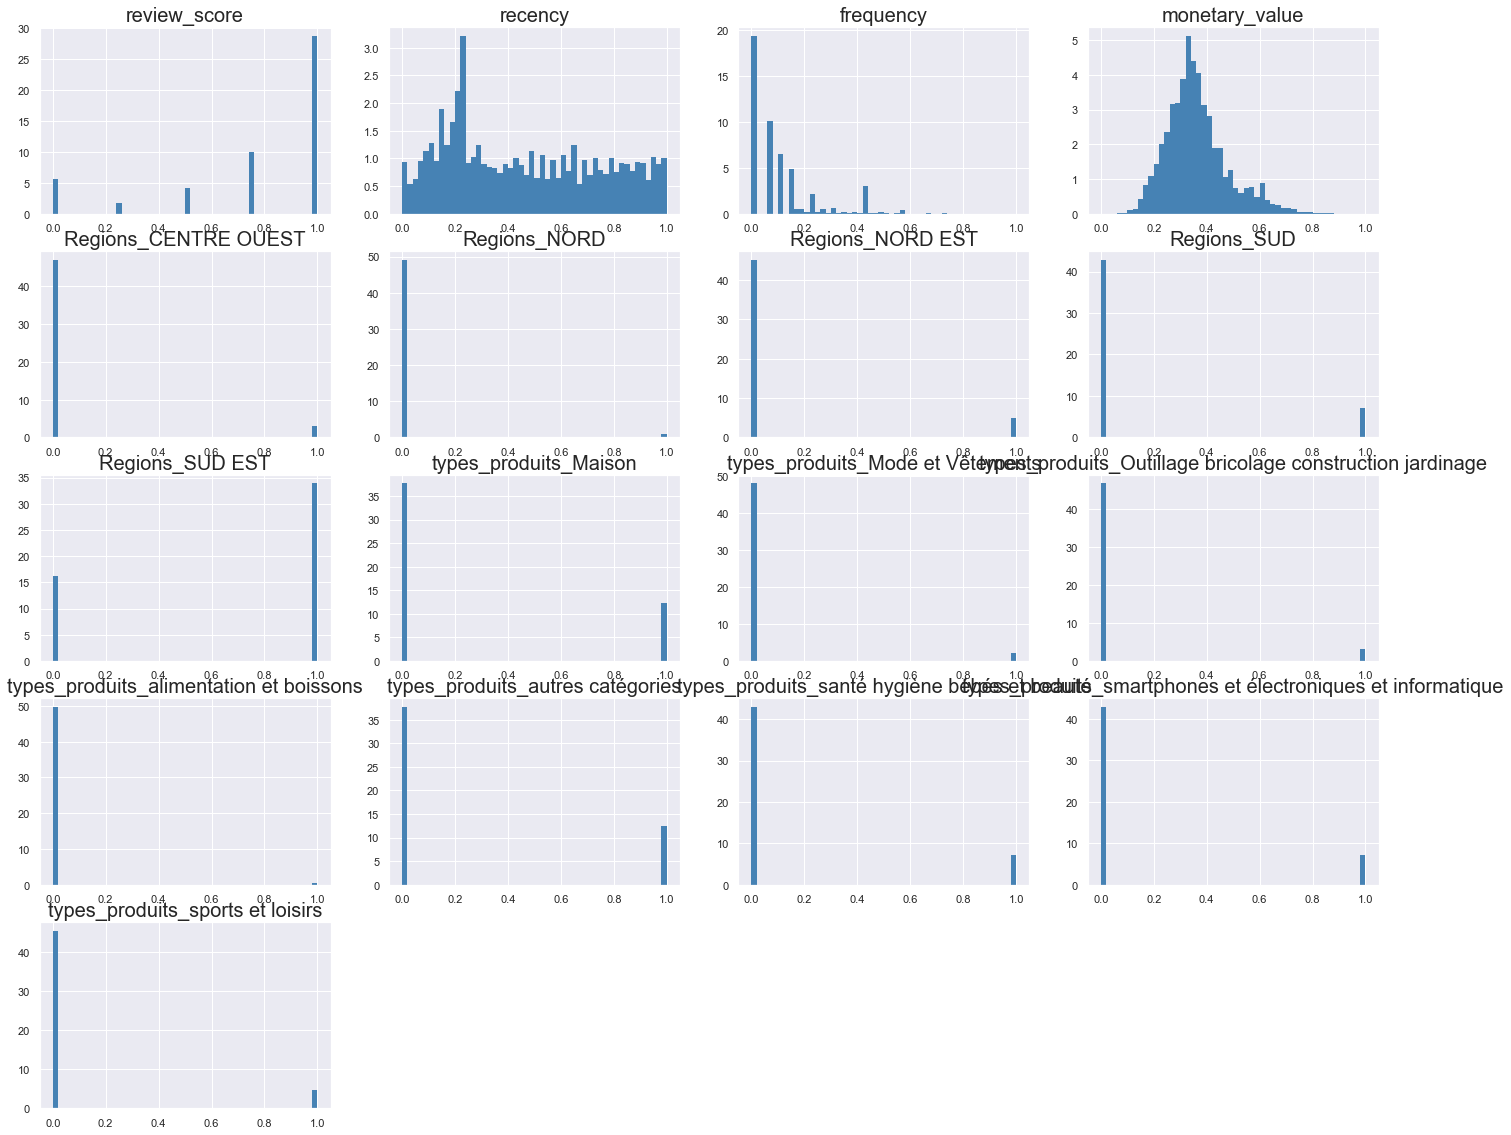

In [12]:
fig = plt.figure(figsize=(24, 24))
for feat_idx in range(X_scaled_2017s2.shape[1]):
    ax = fig.add_subplot(6,4, (feat_idx+1))
    ax.set_title(XCustomer_2017s2.columns[feat_idx], fontdict={'fontsize': 20, 'fontweight': 'medium'})
    
    h = ax.hist(X_scaled_2017s2[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')

# MODEL KMeans

## Année 2017

## Premier semestre

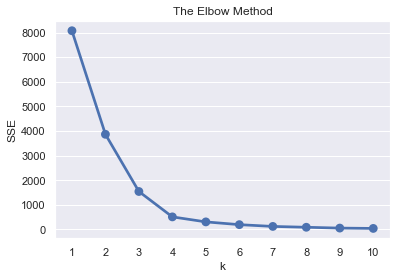

In [13]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(reduced_data_2017s1)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [14]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(reduced_data_2017s1)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_2017s1_k3 = XCustomer_2017s1.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_2017s1_k3.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


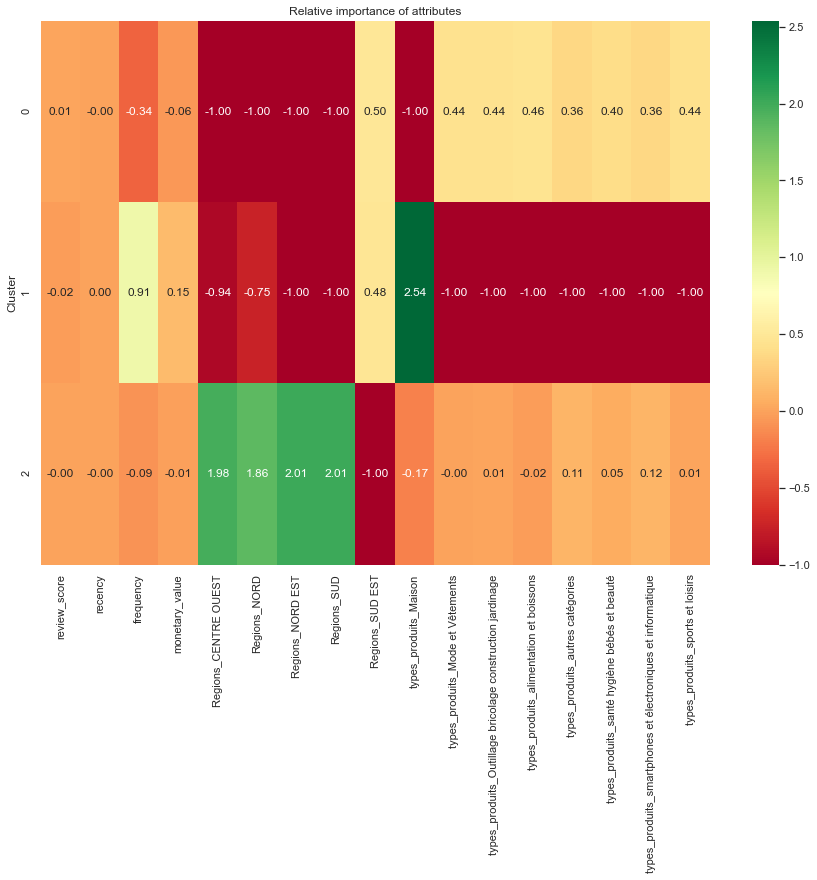

In [15]:
# Calculate average data values for each cluster
cluster_avg = data_process_2017s1_k3.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_2017s1.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


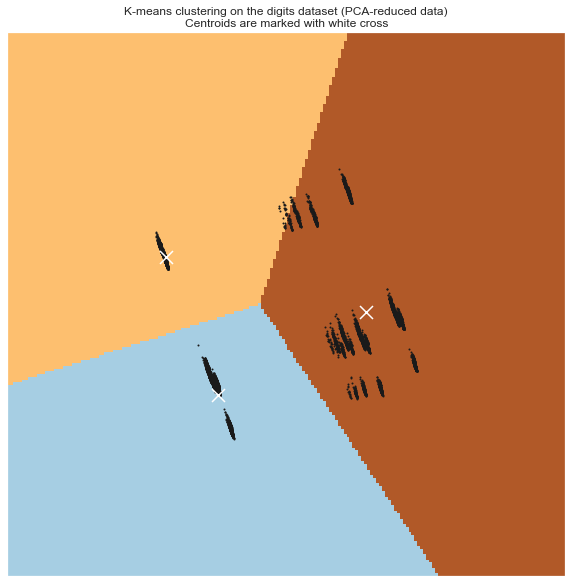

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_2017s1)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_2017s1[:, 0].min() - 1, reduced_data_2017s1[:, 0].max() + 1
y_min, y_max = reduced_data_2017s1[:, 1].min() - 1, reduced_data_2017s1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_2017s1[:, 0], reduced_data_2017s1[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [17]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(reduced_data_2017s1)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_2017s1_k4 = XCustomer_2017s1.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_2017s1_k4.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,2.0,6.0,0.0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


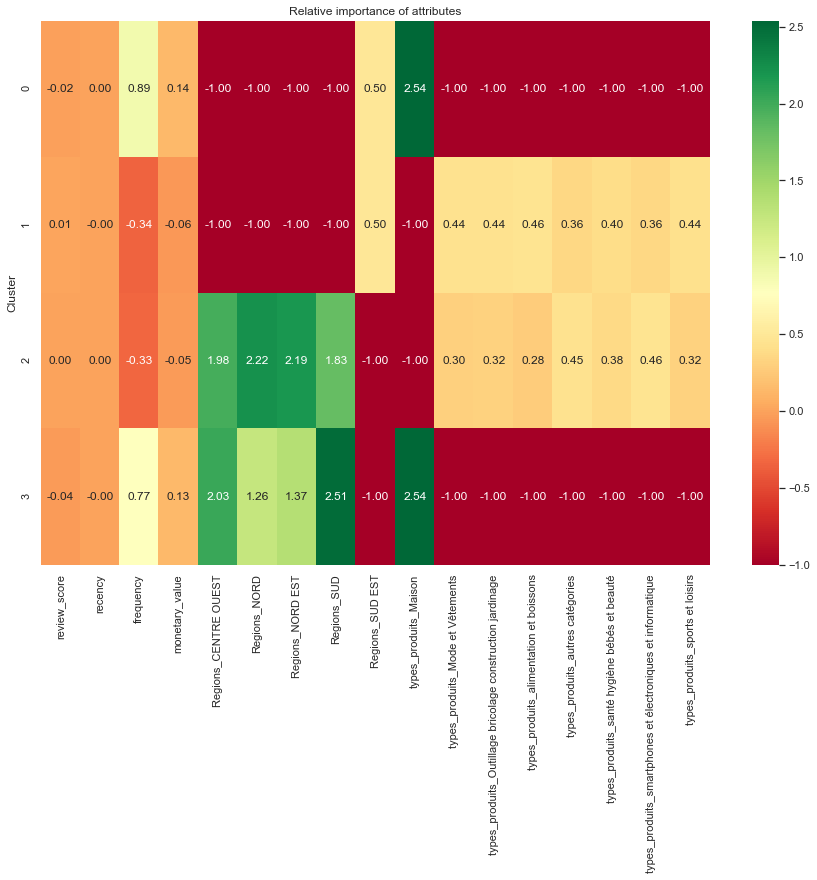

In [18]:
# Calculate average data values for each cluster
cluster_avg = data_process_2017s1_k4.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_2017s1.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


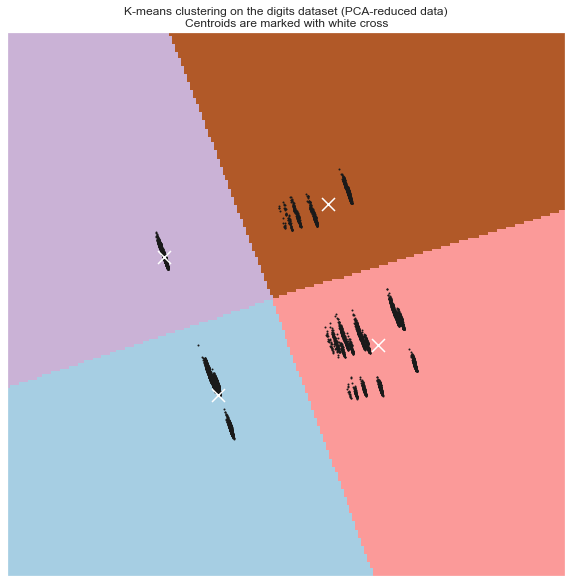

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_2017s1)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_2017s1[:, 0].min() - 1, reduced_data_2017s1[:, 0].max() + 1
y_min, y_max = reduced_data_2017s1[:, 1].min() - 1, reduced_data_2017s1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_2017s1[:, 0], reduced_data_2017s1[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Second semestre

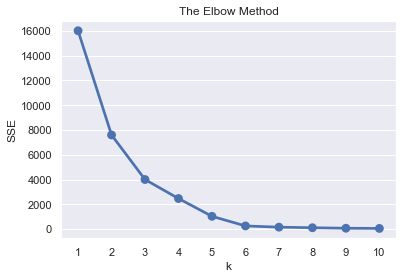

In [20]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(reduced_data_2017s2)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [21]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(reduced_data_2017s2)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_2017s2_k3 = XCustomer_2017s2.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_2017s2_k3.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


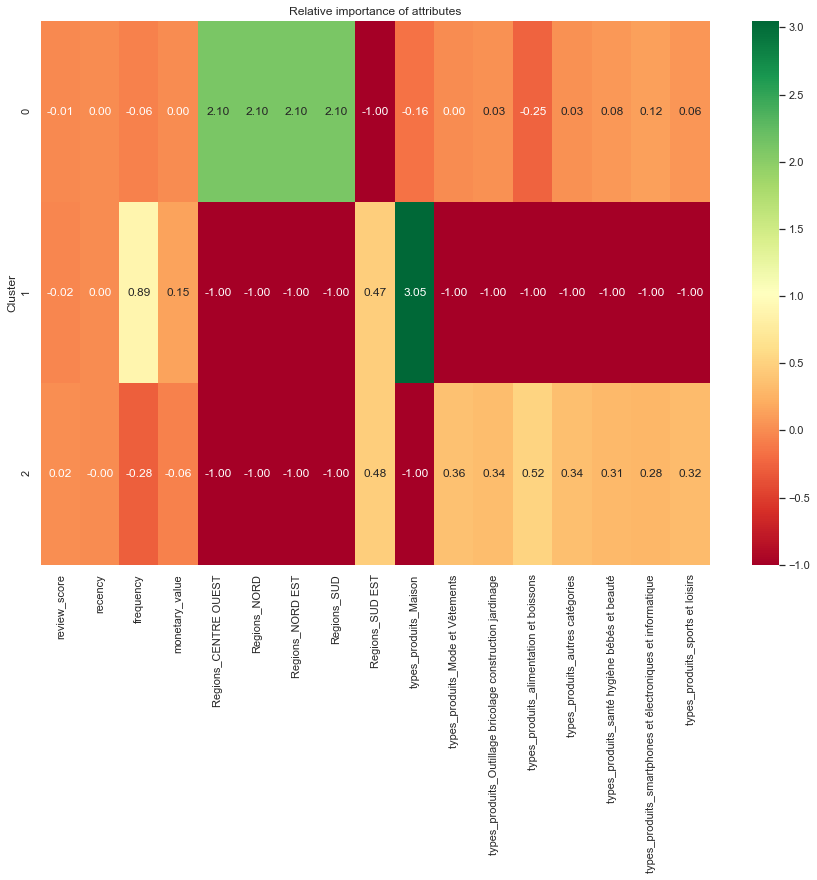

In [22]:
# Calculate average data values for each cluster
cluster_avg = data_process_2017s2_k3.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_2017s2.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


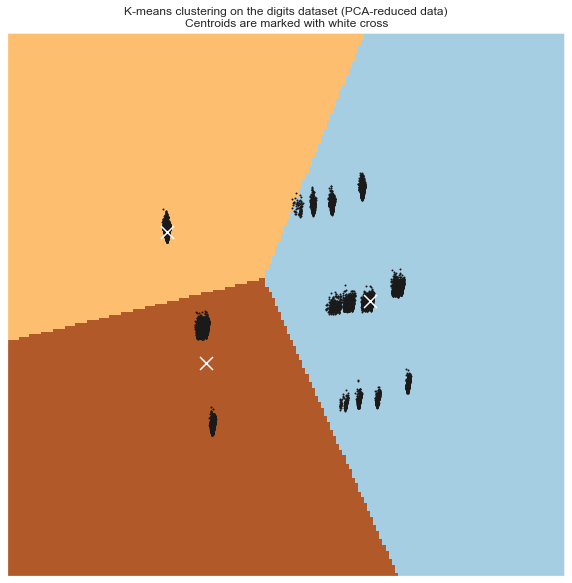

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_2017s2)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_2017s2[:, 0].min() - 1, reduced_data_2017s2[:, 0].max() + 1
y_min, y_max = reduced_data_2017s2[:, 1].min() - 1, reduced_data_2017s2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_2017s2[:, 0], reduced_data_2017s2[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [24]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(reduced_data_2017s2)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_2017s2_k4 = XCustomer_2017s2.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_2017s2_k4.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


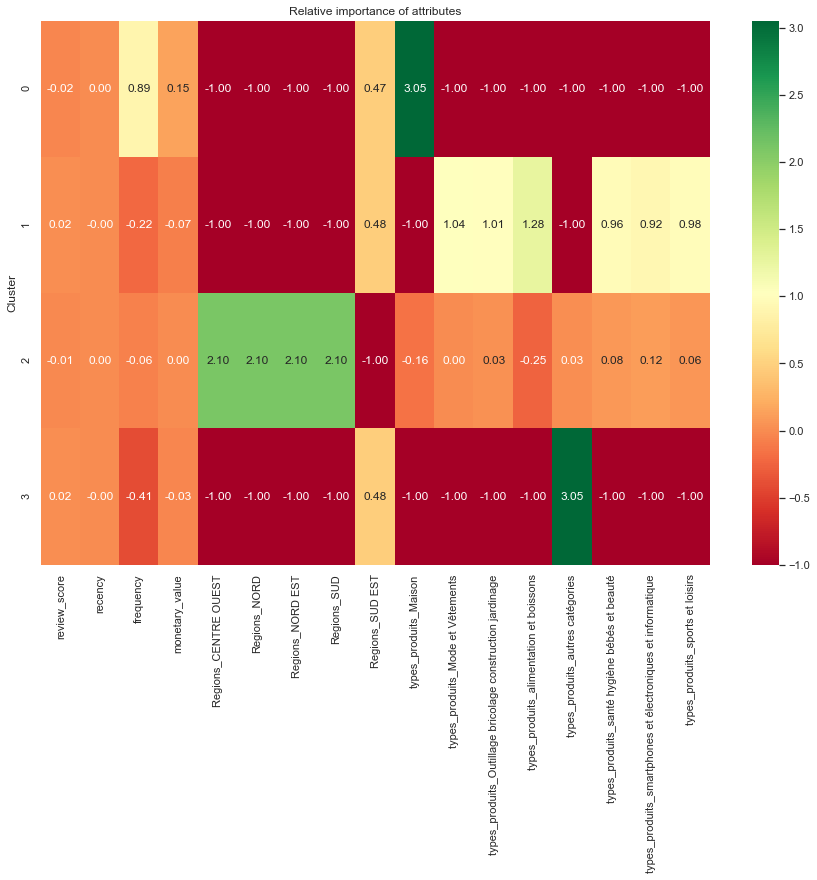

In [25]:
# Calculate average data values for each cluster
cluster_avg = data_process_2017s2_k4.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_2017s2.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

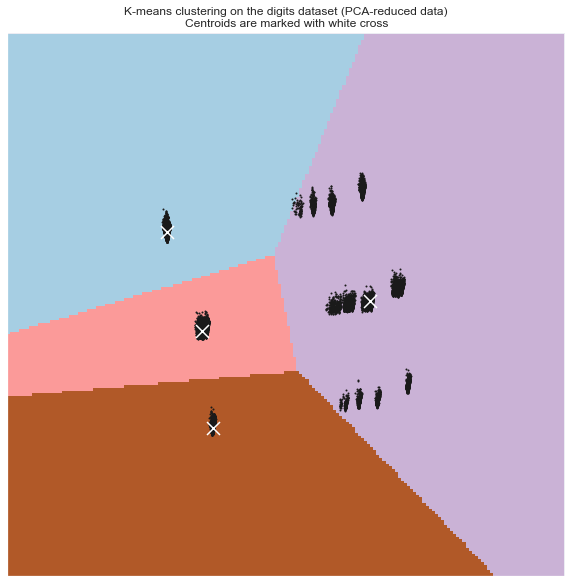

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_2017s2)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_2017s2[:, 0].min() - 1, reduced_data_2017s2[:, 0].max() + 1
y_min, y_max = reduced_data_2017s2[:, 1].min() - 1, reduced_data_2017s2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_2017s2[:, 0], reduced_data_2017s2[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# MODEL DBSCAN

## Année 2017

## Premier semestre

In [27]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.datasets import make_blobs
#from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
  
# Load data in X 
db = DBSCAN(eps=0.3, min_samples=10).fit(reduced_data_2017s1) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
cluster_labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0) 
 
print(cluster_labels) 

# Assign cluster labels to original pre-transformed data set
data_process_2017s1_ds = XCustomer_2017s1.assign(Cluster = cluster_labels)
# Group data set by DBSCAN cluster
data_process_2017s1_ds.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0) 

[0 1 2 ... 1 3 1]


,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,2.0,6.0,0.0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


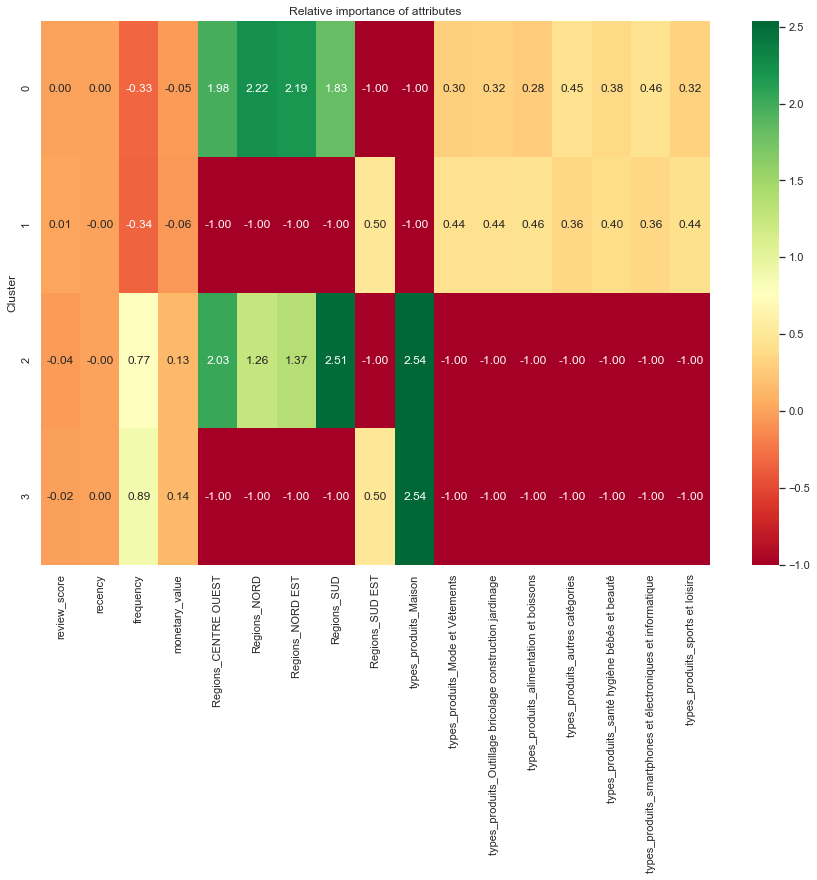

In [28]:
# Calculate average data values for each cluster
cluster_avg = data_process_2017s1_ds.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_2017s1.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

[0 1 2 ... 1 3 1]
['y', 'b', 'g', 'r']


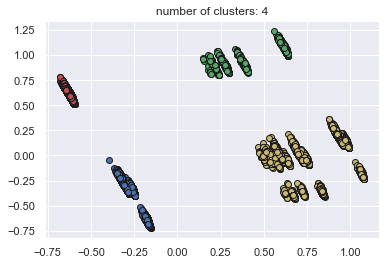

In [29]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.datasets import make_blobs
#from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
  
# Load data in X 
db = DBSCAN(eps=0.3, min_samples=10).fit(reduced_data_2017s1) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
print(labels) 
  
# Plot result 
import matplotlib.pyplot as plt 
  
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r']
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = reduced_data_2017s1[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = reduced_data_2017s1[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 

# COMPARE MODELS KMeans vs DBSCAN

## Année 2017

## Premier semestre

In [30]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
scaled_features_2017s1 = reduced_data_2017s1

In [32]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [33]:
kmeans.fit(scaled_features_2017s1)

KMeans(init='random', n_clusters=4, random_state=42)

In [34]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_2017s1)
    sse.append(kmeans.inertia_)

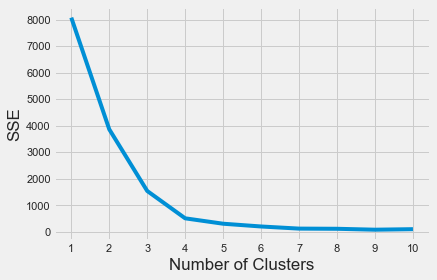

In [35]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()


In [36]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [37]:
kl.elbow

4

In [38]:
#A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_2017s1)
    score = silhouette_score(scaled_features_2017s1, kmeans.labels_)
    silhouette_coefficients.append(score)

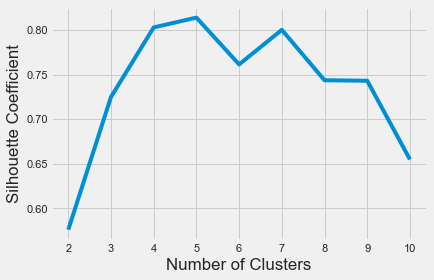

In [39]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [41]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=3)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features_2017s1)
dbscan.fit(scaled_features_2017s1)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features_2017s1, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features_2017s1, dbscan.labels_
).round (2)

In [42]:
kmeans_silhouette

0.72

In [43]:
dbscan_silhouette

0.8

In [44]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=4)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features_2017s1)
dbscan.fit(scaled_features_2017s1)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features_2017s1, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features_2017s1, dbscan.labels_
).round (2)

In [45]:
kmeans_silhouette

0.8

In [46]:
dbscan_silhouette

0.8

In [47]:
X2017s1 = scaled_features_2017s1

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X2017s1)
y_kmeans_2017s1 = kmeans.predict(X2017s1)

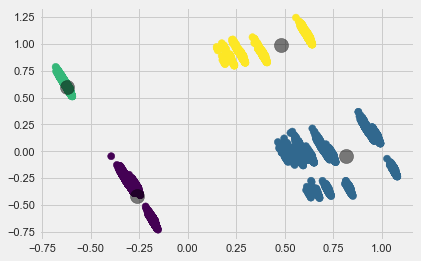

In [49]:
plt.scatter(X2017s1[:, 0], X2017s1[:, 1], c=y_kmeans_2017s1, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Second semestre

In [50]:
scaled_features_2017s2 = reduced_data_2017s2

In [51]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [52]:
kmeans.fit(scaled_features_2017s2)

KMeans(init='random', n_clusters=4, random_state=42)

In [53]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_2017s2)
    sse.append(kmeans.inertia_)

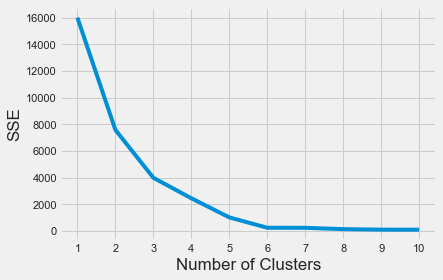

In [54]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()


In [55]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [56]:
kl.elbow

3

In [57]:
#A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_2017s2)
    score = silhouette_score(scaled_features_2017s2, kmeans.labels_)
    silhouette_coefficients.append(score)

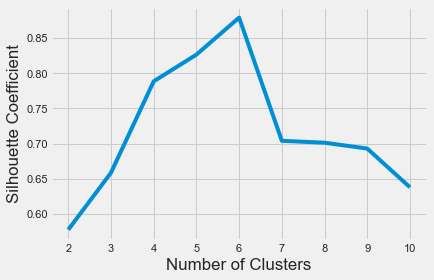

In [58]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [60]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=4)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features_2017s2)
dbscan.fit(scaled_features_2017s2)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features_2017s2, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features_2017s2, dbscan.labels_
).round (2)

In [61]:
kmeans_silhouette

0.79

In [62]:
dbscan_silhouette

0.88

In [63]:
X2017s2 = scaled_features_2017s2

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X2017s2)
y_kmeans_2017s2 = kmeans.predict(X2017s2)

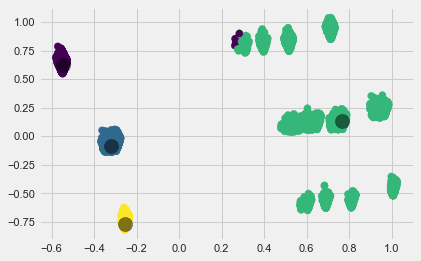

In [65]:
plt.scatter(X2017s2[:, 0], X2017s2[:, 1], c=y_kmeans_2017s2, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Stabilité du modèle kmean 

## Année 2017

## Premier semestre

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X2017s1)
labels2017s1 = kmeans.labels_

In [67]:
pred2017s1 = kmeans.predict(X2017s1)

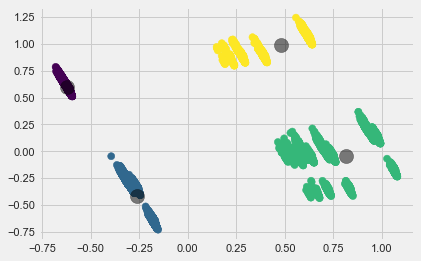

In [68]:
plt.scatter(X2017s1[:, 0], X2017s1[:, 1], c=pred2017s1, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [69]:
from sklearn import metrics

#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(pred2017s1, labels2017s1))
print("Completeness: %0.3f" % metrics.completeness_score(pred2017s1, labels2017s1))
print("V-measure: %0.3f" % metrics.v_measure_score(pred2017s1, labels2017s1))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(pred2017s1, labels2017s1))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(pred2017s1, labels2017s1))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s1, labels2017s1))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.803


In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X2017s1)
labels = kmeans.labels_

In [71]:
kmeans2 = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X2017s1)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [72]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s1, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.803


In [73]:
kmeans2 = KMeans(n_clusters=4, n_init=2, init='k-means++').fit(X2017s1)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [74]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s1, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.803


In [75]:
kmeans2 = KMeans(n_clusters=4, n_init=5, init='k-means++').fit(X2017s1)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [76]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s1, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.803


In [77]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X2017s1)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [78]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s1, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.803


In [79]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X2017s1)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [80]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s1, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.803


In [81]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X2017s1)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [82]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s1, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.803


## Second semestre

In [83]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X2017s2)
labels2017s2 = kmeans.labels_

In [84]:
pred2017s2 = kmeans.predict(X2017s2)

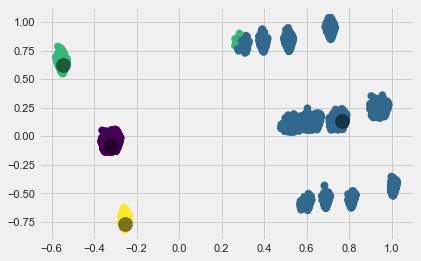

In [85]:
plt.scatter(X2017s2[:, 0], X2017s2[:, 1], c=pred2017s2, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [86]:
from sklearn import metrics

#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(pred2017s2, labels2017s2))
print("Completeness: %0.3f" % metrics.completeness_score(pred2017s2, labels2017s2))
print("V-measure: %0.3f" % metrics.v_measure_score(pred2017s2, labels2017s2))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(pred2017s2, labels2017s2))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(pred2017s2, labels2017s2))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s2, labels2017s2))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.789


In [87]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X2017s2)
labels = kmeans.labels_

In [88]:
kmeans2 = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X2017s2)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6659807244921438

In [89]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s2, kmeans.labels_))

Homogeneity: 0.762
Completeness: 0.859
V-measure: 0.808
Adjusted Rand Index: 0.666
Adjusted Mutual Information: 0.808
Silhouette Coefficient: 0.686


In [90]:
kmeans2 = KMeans(n_clusters=4, n_init=2, init='k-means++').fit(X2017s2)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.885909562179846

In [91]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s2, kmeans.labels_))

Homogeneity: 0.867
Completeness: 0.880
V-measure: 0.873
Adjusted Rand Index: 0.886
Adjusted Mutual Information: 0.873
Silhouette Coefficient: 0.686


In [92]:
kmeans2 = KMeans(n_clusters=4, n_init=5, init='k-means++').fit(X2017s2)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6659807244921438

In [93]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s2, kmeans.labels_))

Homogeneity: 0.762
Completeness: 0.859
V-measure: 0.808
Adjusted Rand Index: 0.666
Adjusted Mutual Information: 0.808
Silhouette Coefficient: 0.686


In [94]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X2017s2)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6659807244921438

In [95]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s2, kmeans.labels_))

Homogeneity: 0.762
Completeness: 0.859
V-measure: 0.808
Adjusted Rand Index: 0.666
Adjusted Mutual Information: 0.808
Silhouette Coefficient: 0.686


In [96]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X2017s2)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6659807244921438

In [97]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2017s2, kmeans.labels_))

Homogeneity: 0.762
Completeness: 0.859
V-measure: 0.808
Adjusted Rand Index: 0.666
Adjusted Mutual Information: 0.808
Silhouette Coefficient: 0.686
